## Limits of diversification

In [3]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
%matplotlib inline
import risk_toolkit as rk
import pandas as pd
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
ind_return = rk.get_ind_returns()
ind_nfirms = rk.get_ind_nfirms()
ind_size = rk.get_ind_size()

### Let's compute the market cap of each portfolio

In [8]:
ind_mktcap = ind_nfirms * ind_size

In [11]:
total_mkt_cap = ind_mktcap.sum(axis='columns')

<AxesSubplot:>

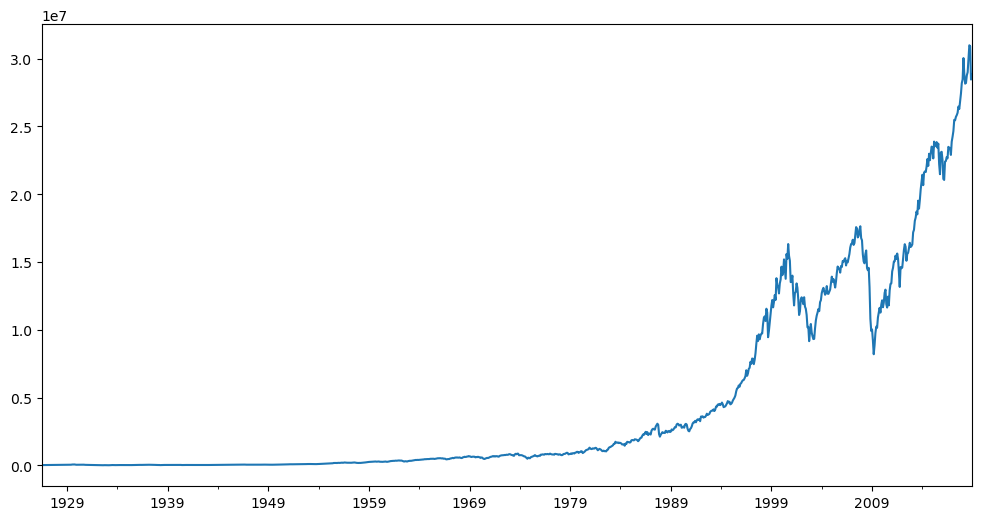

In [13]:
total_mkt_cap.plot(figsize=(12,6))

In [14]:
ind_cap_weight = ind_mktcap.divide(total_mkt_cap, axis='rows')

<AxesSubplot:>

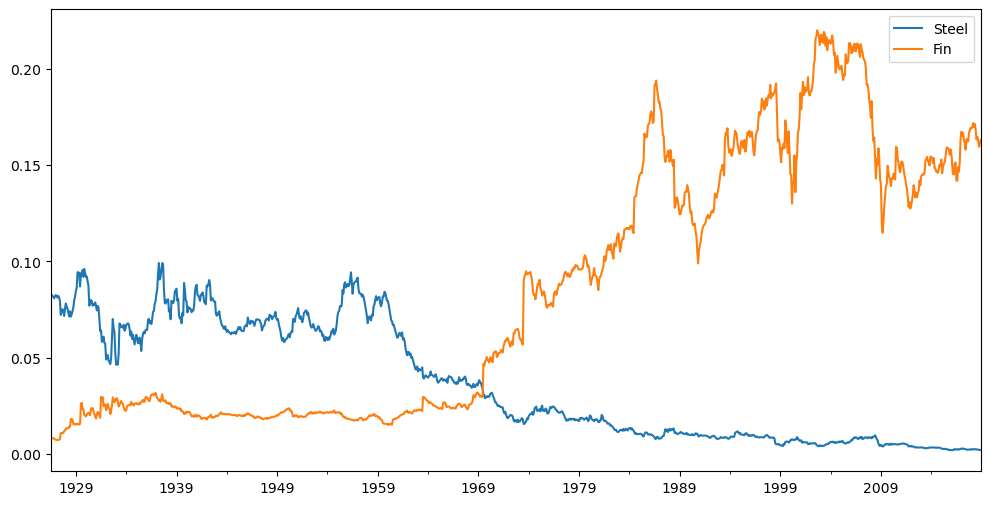

In [15]:
ind_cap_weight[['Steel', 'Fin']].plot(figsize=(12,6))

### Compute the weighted average index

In [16]:
total_market_return = (ind_cap_weight * ind_return).sum(axis='columns')

<AxesSubplot:title={'center':'Total Market Cap-Weighted Index 1926-2018'}>

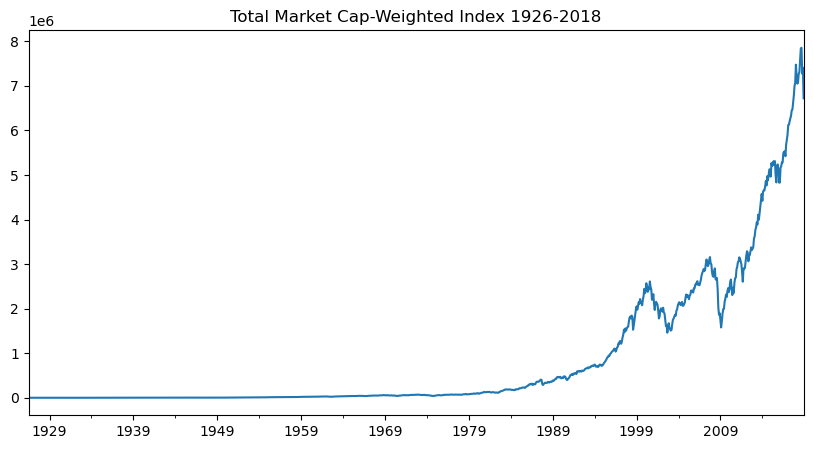

In [17]:
total_market_index = rk.drawdown(total_market_return).Wealth
total_market_index.plot(figsize=(10, 5), title='Total Market Cap-Weighted Index 1926-2018')

Let's plot the index and the moving average (trailing 36 months)

<AxesSubplot:>

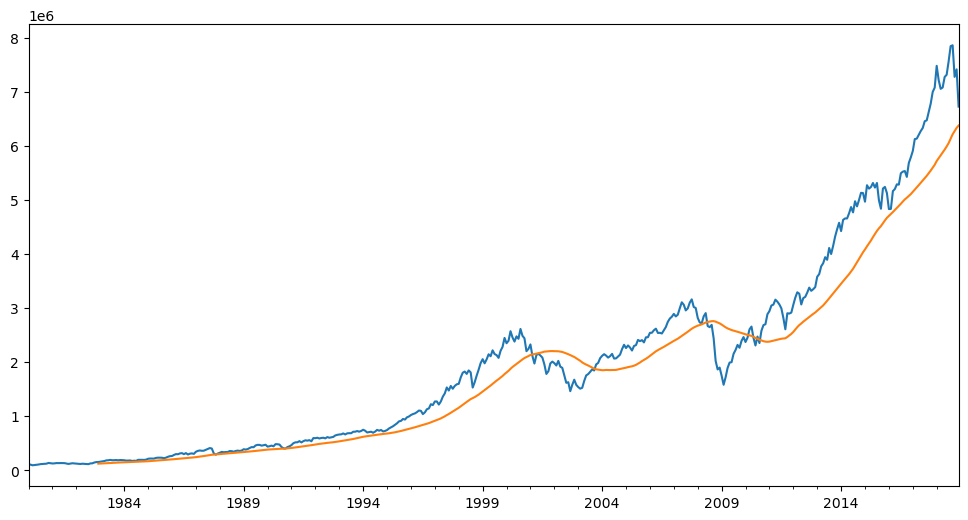

In [20]:
total_market_index['1980':].plot(figsize=(12,6))
total_market_index['1980':].rolling(window=36).mean().plot()

<AxesSubplot:>

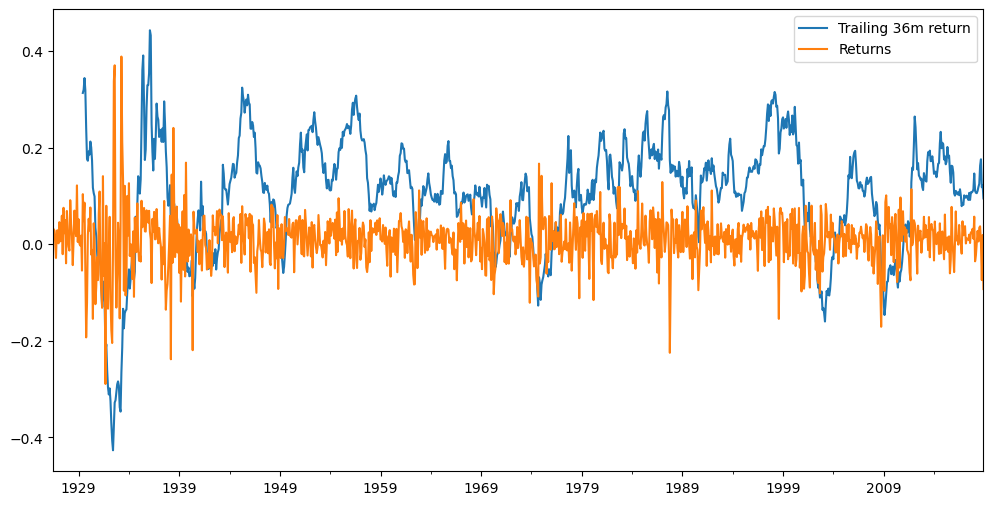

In [22]:
tmi_tr36m_return = total_market_return.rolling(window=36).aggregate(rk.annualized_returns, periods_per_year=12)
tmi_tr36m_return.plot(figsize=(12,6), label='Trailing 36m return', legend=True)
total_market_return.plot(label='Returns', legend=True)

### Rolling correlations - along with multi-indixes and `.groupby`

In [23]:
ts_corr = ind_return.rolling(window=36).corr()
ts_corr.tail()

Food      Beer     Smoke     Games     Books     Hshld  \
2018-12 Whlsl  0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail  0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals  0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin    0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other  0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                  Clths      Hlth     Chems     Txtls  ...     Telcm  \
2018-12 Whlsl  0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail  0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals  0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin    0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other  0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                  Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
2018-12 Whlsl  0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail  0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals  0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin    0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other  0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                  Meals       Fin     Other  
2018-12 Whlsl  0.643879  0.746480  0.767652  
        Rtail  0.616947  0.611883  0.619918  
        Meals  1.000000  0.502563  0.605226  
        Fin    0.502563  1.000000  0.734837  
        Other  0.605226  0.734837  1.000000  

[5 rows x 30 columns]

In [25]:
ts_corr.index.names = ['date', 'industry']
ts_corr.tail()

Food      Beer     Smoke     Games     Books     Hshld  \
date    industry                                                               
2018-12 Whlsl     0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail     0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals     0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin       0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other     0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                     Clths      Hlth     Chems     Txtls  ...     Telcm  \
date    industry                                          ...             
2018-12 Whlsl     0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail     0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals     0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin       0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other     0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                     Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
date    industry                                                               
2018-12 Whlsl     0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail     0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals     0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin       0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other     0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                     Meals       Fin     Other  
date    industry                                
2018-12 Whlsl     0.643879  0.746480  0.767652  
        Rtail     0.616947  0.611883  0.619918  
        Meals     1.000000  0.502563  0.605226  
        Fin       0.502563  1.000000  0.734837  
        Other     0.605226  0.734837  1.000000  

[5 rows x 30 columns]

In [27]:
ind_tr36_corr = ts_corr.groupby(level='date').apply(lambda cormat: cormat.values.mean())

<AxesSubplot:xlabel='date'>

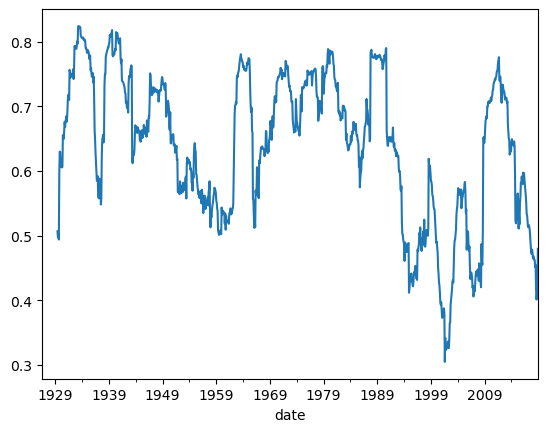

In [28]:
ind_tr36_corr.plot()

<AxesSubplot:>

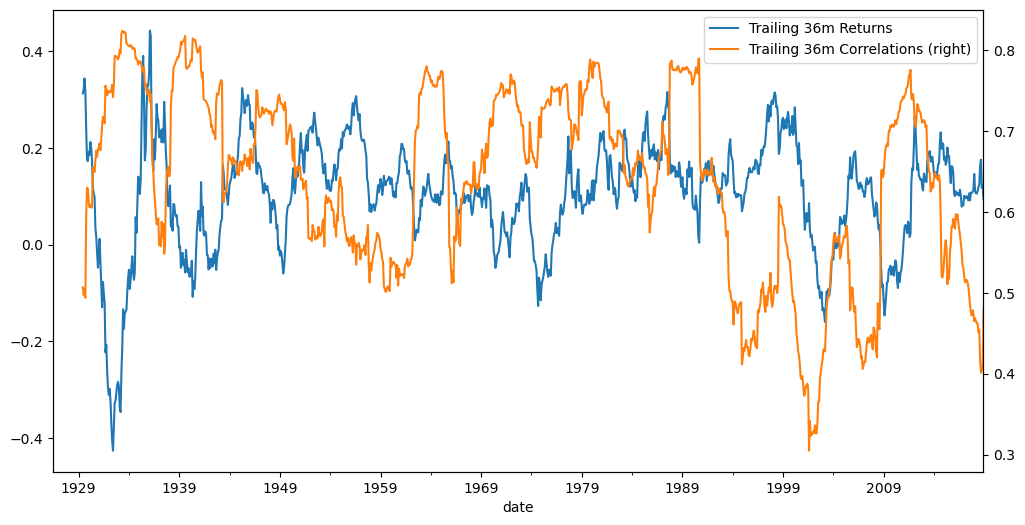

In [30]:
tmi_tr36m_return.plot(label='Trailing 36m Returns', figsize=(12,6), legend=True)
ind_tr36_corr.plot(secondary_y=True, label='Trailing 36m Correlations', legend=True)

### What does this say?

Well, since we are looking at the trailing 36 returns of the market and the trailing correlations, the evidence suggests that when the market is down (bear market), correlation is up and when the market is advancing, correlation is sort of "tamed". This is evidence that diversification "fails" us when it is needed the most, i.e. when the market is down, it is harder to diversify.

<AxesSubplot:>

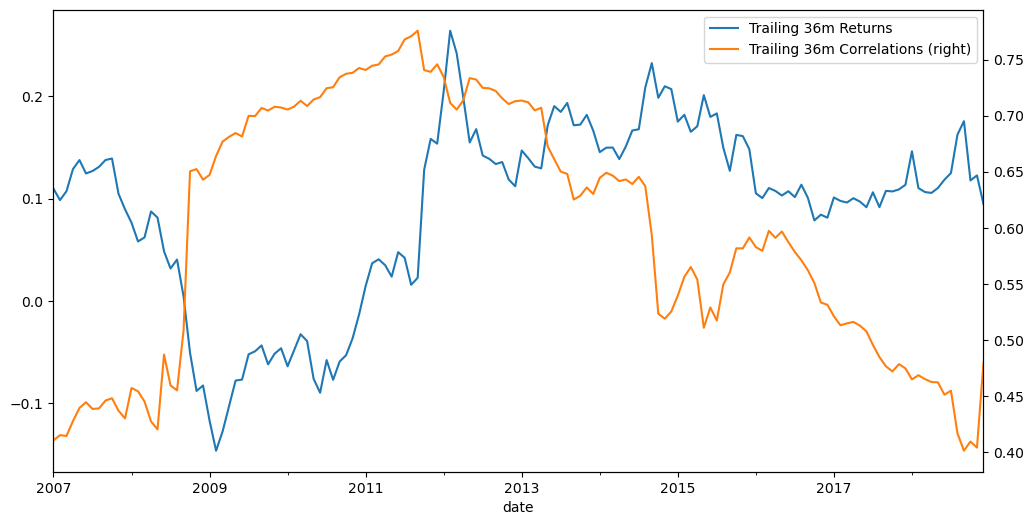

In [31]:
tmi_tr36m_return['2007':].plot(label='Trailing 36m Returns', figsize=(12,6), legend=True)
ind_tr36_corr['2007':].plot(secondary_y=True, label='Trailing 36m Correlations', legend=True)

Let's calculate the correlation between the mean returns and the mean correlations, and it's negative

In [32]:
tmi_tr36m_return.corr(ind_tr36_corr)

-0.28010065062884026